#  Solow 1
## Functional Programming


In [1]:
#Title: Solow Model in Discrete Time
#Author: Sara Brborich
#Date Created: 7/03/2023
#Date Modified: 7/03/2023
#Description: This is the computalization of the Solow Model in python

In [2]:
##Parameters
n = 0.02 #population growth rate
s = 0.25 # saving rate
delta = 0.05 # depreciation rate
g = 0.02 #growth rate of productivity
alpha = 0.3 # labor share

##Variables of Interest
k_star = (( g + n+ g *n + delta ) / s )**( 1 / ( alpha - 1 )) #steady stare level of capital per effective worker

y_star = (( g + n+ g *n + delta ) / s )**( alpha / ( alpha - 1 )) #steady stare level of output per effective worker

k_star # k_star = 4.27
y_star # y_star = 1.54

print("The steady stare level of capital per effective worker is", k_star)
print("The steady stare level of output per effective worker is", y_star)

The steady stare level of capital per effective worker is 4.276635676173673
The steady stare level of output per effective worker is 1.5464314605044003


In [3]:
#Find the path from k(0) to K_star
k0 = 0.1 #initial capital per effective worker
k = [] #inicialices memory 
k.append(k0) #add the initial capital to the memory
print("The evolution  of capital is: ", k)  #print output to check reslts



The evolution  of capital is:  [0.1]


In [4]:
#Define function of the evolution of capital per effective worker
def k_evolution(L_rate, S_rate, dep_rate, A_rate, labor_share, kapital): 
    # compute the one step ahead evolution of capital per effective worker
    return 1 / ( 1 + A_rate + L_rate + ( A_rate * L_rate)) * ( kapital * ( 1 - dep_rate ) + S_rate * ( kapital ** labor_share ))

In [5]:
k.append(k_evolution(n,s, delta, g, alpha, k0 )) # call our function for the one step ahead value of capital

print("The evolution  of capital is: ", k)  #print output to check reslts


The evolution  of capital is:  [0.1, 0.21174241484699932]


In [6]:
# Function that returns a time series of capital per effective worker
# by computing capital per effective worker multiple times

def k_evolution_iter(num_iter, L_rate, S_rate, dep_rate, A_rate, labor_share, kapital):
    #Inicialize an empty list with kapital as its first an only elemnt, this is the initial level of capital
    kapital_ts=[kapital] 
    for i in range(num_iter): #creates a for loop uning num_iter 
        kapital_ts.append(1/(1+A_rate+L_rate+ (A_rate*L_rate)*(kapital_ts[i]*(1-dep_rate)+s*(kapital_ts[i]**labor_share))))

    return kapital_ts


In [7]:
numIterations = 80 #number of time periods to find capital per effective worker
k = k_evolution_iter(numIterations, n, s, delta, g, alpha, k0) #call the function to find the time series of capital per effective worker
k1=k_evolution_iter(numIterations, n, s, delta, g, alpha, 1.5) #initial value of capital per effective worker is 1.5


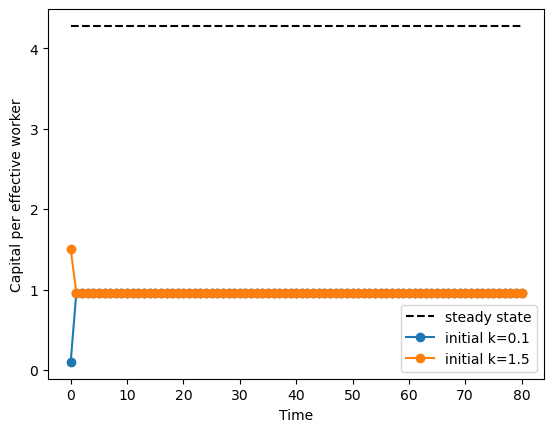

In [8]:
#Plot the time series of capital per effective worker
import matplotlib.pyplot as plt #import the library for plotting

fig, ax = plt.subplots() #create a figure and axes
ax.plot([k_star]*len(k), 'k--', label='steady state') #plot the steady state level of capital per effective worker

ax.plot(k, 'o-', label=f'initial k={k[0]}') #plot the time series of capital per effective worker

ax.plot(k1, 'o-', label=f'initial k={k1[0]}') #plot the time series of capital per effective worker

ax.set_ylabel('Capital per effective worker') #set the y-axis label

ax.set_xlabel('Time') #set the x-axis label

ax.legend() #add a legend

plt.show() #show the plot


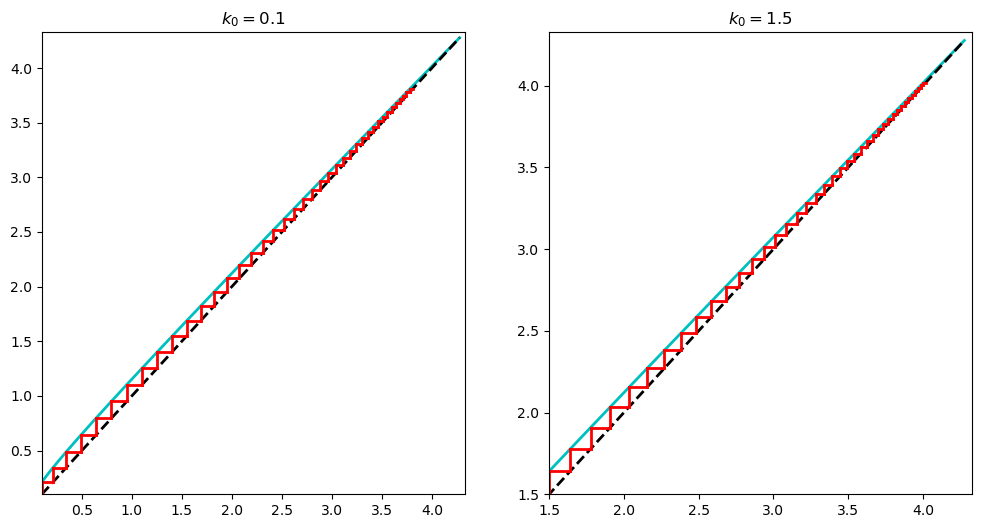

In [9]:
import numpy as np #import the library for numerical computation
def plot_phase_portrait(numIter,n,s,delta,g,alpha,k0, ax = None):
    # find k_star to plot around convergence
    k_star = (( g + n+ g *n + delta ) / s )**( 1 / ( alpha - 1 ))

    # plot te capital evolution function and the k_t+1 = k_t digonal line
    t=np.linspace(0, max(k0,k_star), num=10000) #create enely spaced number between 0 and max(k0,k_star)

    ax.plot(t, k_evolution(n,s,delta,g,alpha,t), 'c-', lw=2)
    ax.plot([0, max(k0,k_star)], [0, max(k0,k_star)], 'k--', lw=2)
    
    # recursively apply k_t+1 = f(k_t) and plot two lines
    # (k_t,kt) -> (k_t,k_t1)
    # (k_t,k_t1) -> (k_t1,k_t1)
    k_t=k0 #initial value of capital per effective worker
    
    for i in range(numIter):
        k_t1=k_evolution(n,s,delta,g,alpha,k_t) #find the next value of capital per effective worker
        ax.plot([k_t,k_t], [k_t,k_t1], 'r-', lw=2) #plot the first line
        ax.plot([k_t,k_t1], [k_t1,k_t1], 'r-', lw=2) #plot the second line
        k_t=k_t1 #update the value of capital per effective worker
    
    if k0 < k_star:
        ax.set_xlim(k0, k_star+0.05)
        ax.set_ylim(k0, k_star+0.05)

    else:
        ax.set_xlim(k_star-0.05, k0)
        ax.set_ylim(k_star-0.05, k0)
    
    ax.set_title(f"$k_0={k0:.1f}$")
    
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
plot_phase_portrait(40,n,s,delta,g,alpha,k0, ax=ax1)   
plot_phase_portrait(40,n,s,delta,g,alpha,1.5, ax=ax2)     
plt.show()      







